<a href="https://colab.research.google.com/github/Muskan-Sh-23/Machine-learning/blob/main/Regresssion_Imperfect_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

#Load the dataset
df = pd.read_csv('/content/kc_house_data.csv.zip')

#First kook at the data
print(df.head())
print(df.info())
print(df.describe())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [5]:
df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long','grade', 'sqft_lot', 'bedrooms',  'yr_renovated','sqft_living15','sqft_lot15', 'sqft_above','floors', 'sqft_basement','waterfront','view', 'condition',] )

,price,bathrooms,sqft_living,yr_built
0,221900.0,1.00,1180,1955
1,538000.0,2.25,2570,1951
2,180000.0,1.00,770,1933
3,604000.0,3.00,1960,1965
4,510000.0,2.00,1680,1987
...,...,...,...,...
21608,360000.0,2.50,1530,2009
21609,400000.0,2.50,2310,2014
21610,402101.0,0.75,1020,2009
21611,400000.0,2.50,1600,2004


In [7]:
print(df.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [8]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
df['house_age'] = 2025 - df['yr_built']
df.drop(columns=['yr_built'], inplace=True)
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age'],
      dtype='object')


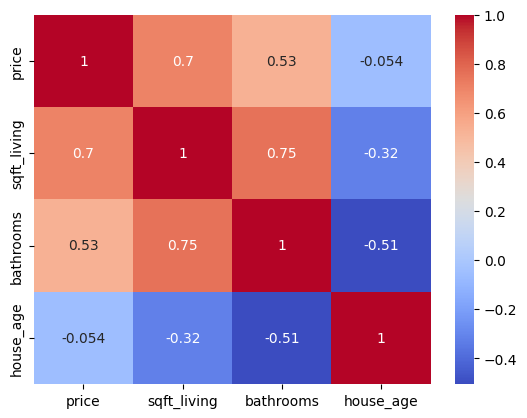

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#Select the relevant columns
corr_df = df[['price', 'sqft_living','bathrooms','house_age']]

#Calculate the correlation matrix
corr_matrix = corr_df.corr()

#Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
print(df.isnull().sum()) #Check for missing values
print(df.duplicated().sum()) #Check for duplicate rows
print(df.dtypes) #Check the data types of the columns

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
house_age        0
dtype: int64
0
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
house_age          int64
dtype: object


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Select features and target
x = df[['sqft_living']]
y = df['price']

In [14]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(x_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 76484977061.77612
R-squared: 0.49406905389089006
Root Mean Squared Error: 276559.1746114674


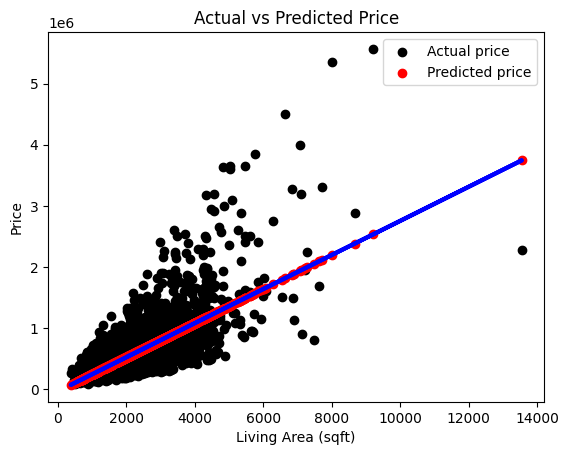

In [18]:
plt.scatter(x_test, y_test, color='black', label = 'Actual price')
plt.scatter(x_test, y_pred, color='red', label = 'Predicted price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.legend()
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.title('Actual vs Predicted Price')
plt.xlabel('Living Area (sqft)')
plt.show()

In [31]:
# Select all the four features
x1 = df[['bathrooms','sqft_living','house_age']]
y1 = df['price']

In [32]:
y_log = np.log(df['price'])

In [33]:
# Split the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [27]:
# Create and train the model
model1 = LinearRegression()
model1.fit(x1_train, y1_train)

LinearRegression()

In [28]:
y1_pred = model1.predict(x1_test)

In [29]:
mse = mean_squared_error(y1_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y1_test, y_pred)
print('R-squared:', r2)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 76484977061.77612
R-squared: 0.49406905389089006
Root Mean Squared Error: 276559.1746114674


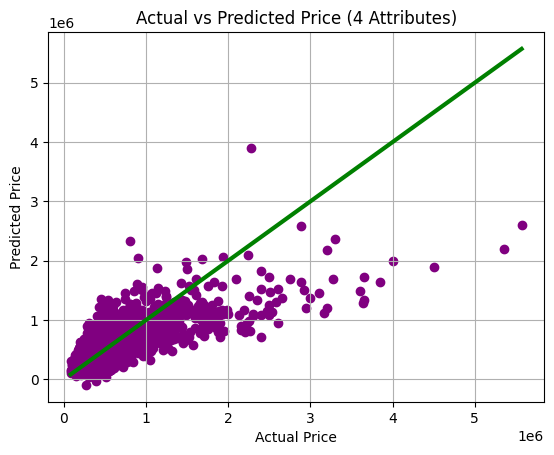

In [30]:
# Scatter plot of actual vs predicted prices
plt.scatter(y1_test, y1_pred, color='purple')

# Plot a line where predicted = actual (ideal case)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], color='green', linewidth=3)

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (4 Attributes)')
plt.grid(True)
plt.show()

In [ ]:
print(x1.head())

   bathrooms  sqft_living  house_age
0       1.00         1180         70
1       2.25         2570         74
2       1.00          770         92
3       3.00         1960         60
4       2.00         1680         38


In [ ]:
print(model1.coef_)

[66325.12720385   266.74503404  2867.581888  ]


In [ ]:
print(df[['sqft_living','bathrooms','house_age']].corr())

             sqft_living  bathrooms  house_age
sqft_living     1.000000   0.754665  -0.318049
bathrooms       0.754665   1.000000  -0.506019
house_age      -0.318049  -0.506019   1.000000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Select your updated features and target
X = df[['bathrooms', 'sqft_living', 'house_age']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Polynomial Features (try degree=2 first)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 77901561914.72221
RMSE: 279108.51279515325
R²: 0.48469866322821153


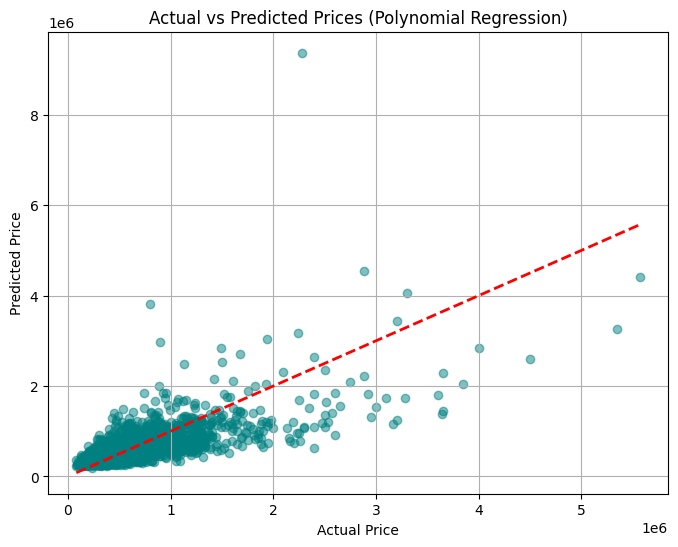

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Polynomial Regression)")
plt.grid(True)
plt.show()

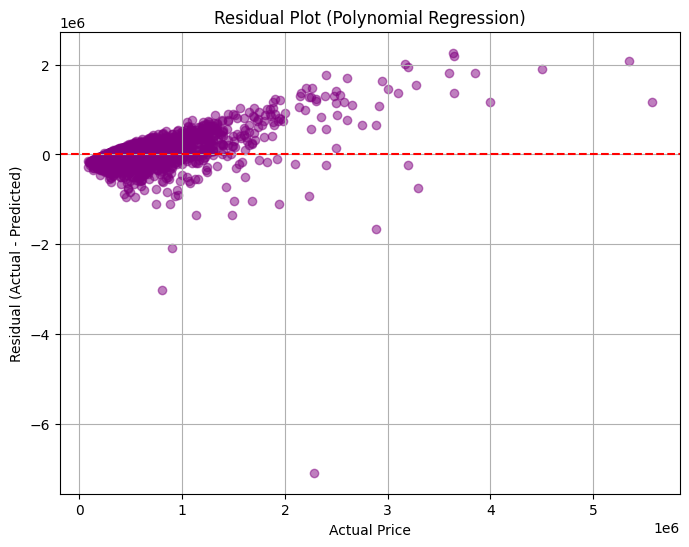

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot (Polynomial Regression)")
plt.grid(True)
plt.show()

Mean Squared Error: 555877748039.7795
Root Mean Squared Error: 745572.094461548
R-squared: -2.677006463107335


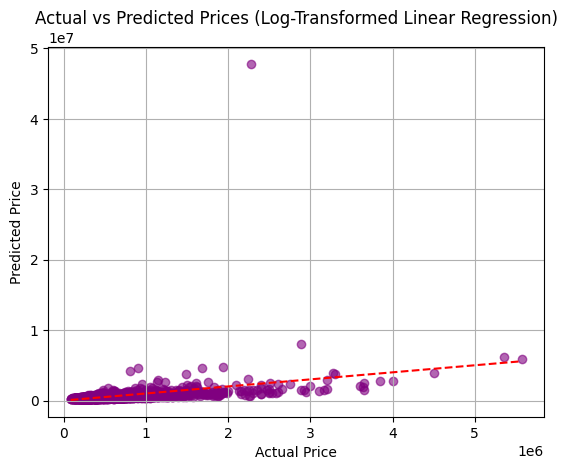

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/kc_house_data.csv (1).zip')

# Select features and target
X = df[['sqft_living', 'bathrooms', 'floors', 'view']]
y = df['price']

# Apply log transformation to the target
y_log = np.log(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred_log = model.predict(X_test_scaled)

# Reverse the log transformation for predictions
y_pred_actual = np.exp(y_pred_log)
y_test_actual = np.exp(y_test)

# Evaluate
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plot Actual vs Predicted
plt.scatter(y_test_actual, y_pred_actual, color='purple', alpha=0.6)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Log-Transformed Linear Regression)")
plt.grid(True)
plt.show()

In [ ]:
print(df['price'].min)

<bound method Series.min of 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64>


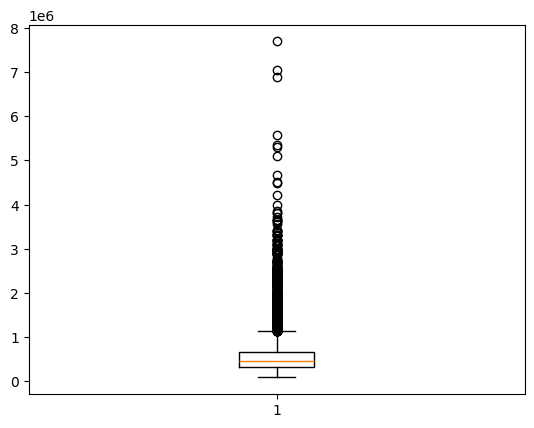

In [ ]:
plt.boxplot(df['price'])
plt.show()